# Convolutional Autoencoder Example Using MNIST

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Dropout, Flatten, Dense, Reshape
)
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Data Preperation

In [52]:
# Load the Fashion-MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.fashion_mnist.load_data()

In [53]:
# Normalize the data to range [0, 1] and reshape to include a channel dimension
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension (28x28x1)
X_test = np.expand_dims(X_test, axis=-1)

In [54]:
# Define the Convolutional Autoencoder
input_img = Input(shape=(28, 28, 1))

In [60]:
# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)  # Shape: (14, 14, 32)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)  # Shape: (7, 7, 64)
encoded = Dropout(0.2)(x)  # Latent space: (7, 7, 64)

In [61]:
# Latent Space
latent_dim = 64
x = Flatten()(encoded)
latent = Dense(latent_dim, activation="relu", name="latent_vector")(x)

In [62]:
# Decoder
x = Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)  # Shape: (14, 14, 64)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)  # Shape: (28, 28, 32)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)  # Shape: (28, 28, 1)

# Autoencoder Model

In [63]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 64)        184

## Train the Autoencoder

In [64]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test, X_test),
)

Epoch 1/20
469/469 [==============================] - 57s 120ms/step - loss: 0.3067 - val_loss: 0.3200
Epoch 2/20
469/469 [==============================] - 56s 120ms/step - loss: 0.2678 - val_loss: 0.2629
Epoch 3/20
469/469 [==============================] - 57s 121ms/step - loss: 0.2636 - val_loss: 0.2620
Epoch 4/20
469/469 [==============================] - 61s 130ms/step - loss: 0.2614 - val_loss: 0.2590
Epoch 5/20
469/469 [==============================] - 66s 140ms/step - loss: 0.2599 - val_loss: 0.2590
Epoch 6/20
469/469 [==============================] - 65s 138ms/step - loss: 0.2590 - val_loss: 0.2565
Epoch 7/20
469/469 [==============================] - 63s 134ms/step - loss: 0.2584 - val_loss: 0.2554
Epoch 8/20
469/469 [==============================] - 63s 135ms/step - loss: 0.2576 - val_loss: 0.2569
Epoch 9/20
469/469 [==============================] - 59s 125ms/step - loss: 0.2572 - val_loss: 0.2546
Epoch 10/20
469/469 [==============================] - 59s 126ms/step - l

In [65]:
# Encode and Decode the Test Data
encoded_imgs = Model(input_img, latent).predict(X_test)  # Extract latent vectors
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 4s 13ms/step


# Visualization

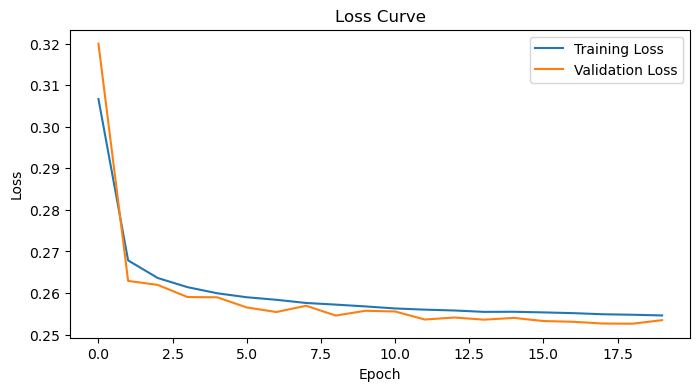

In [66]:
# Plot Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

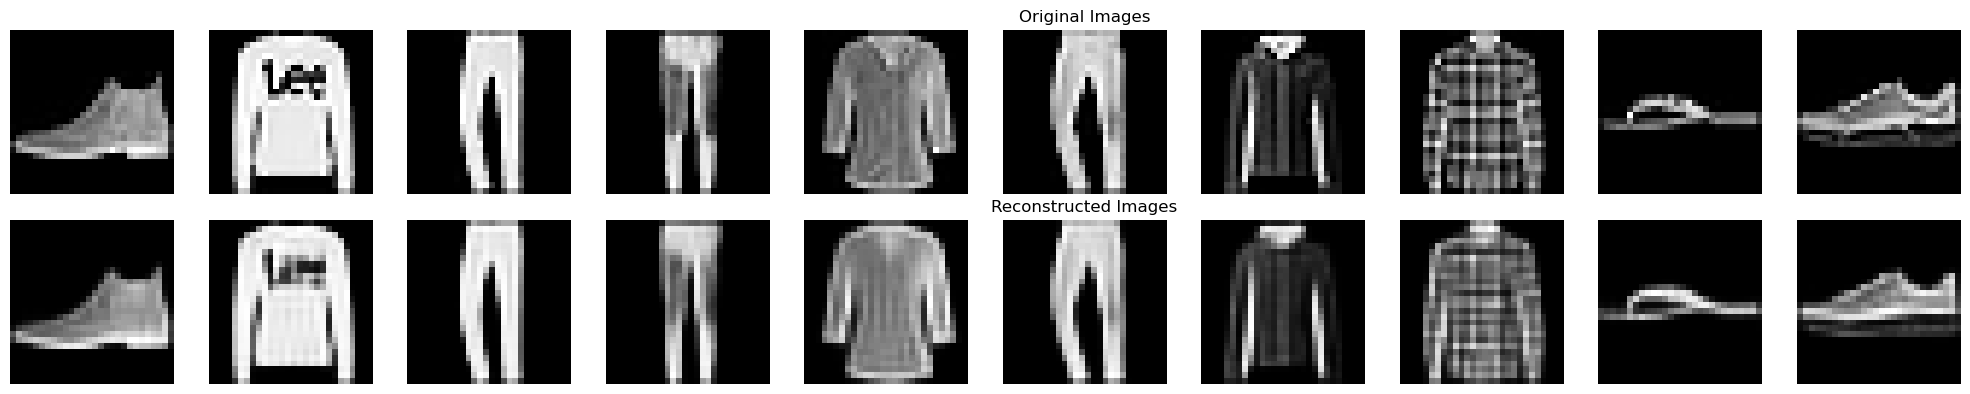

In [71]:
# Visualize Original and Reconstructed Images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == n // 2:
        plt.title("Original Images")

    # Reconstructed images
    plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == n // 2:
        plt.title("Reconstructed Images")

plt.tight_layout()
plt.show()

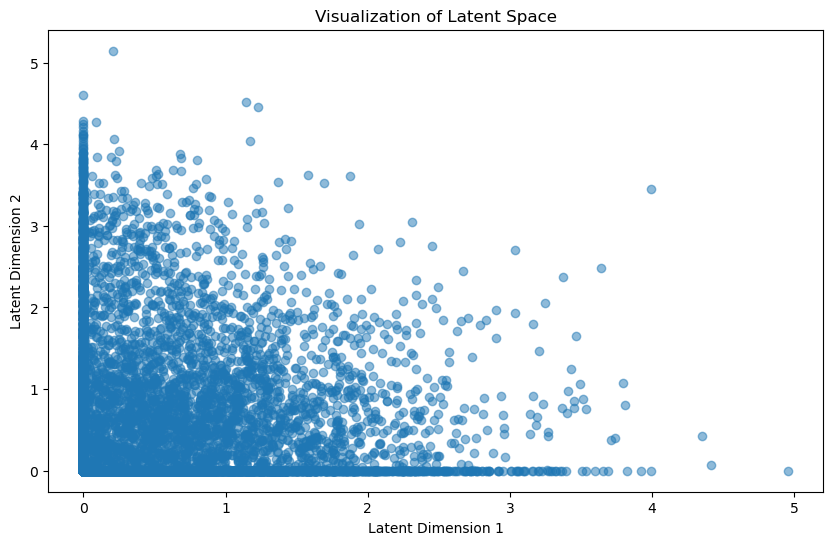

In [72]:
# Visualize Latent Space
plt.figure(figsize=(10, 6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], alpha=0.5)
plt.title("Visualization of Latent Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()